<a href="https://colab.research.google.com/github/jogepa/License_plate_detection/blob/main/License_plate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import requiered dependencies

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
#Importing libraries
import cv2
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt 
from tensorflow.keras.models import load_model

#Loading Preprocessed Images


In [5]:
#Load individual images
chars = np.load('/content/gdrive/Shareddrives/Character_images/plate_chars.npy')
print("Image of individual characters loaded")

Image of individual characters loaded


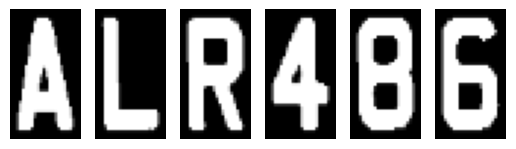

In [6]:
#Show individual images
for i in range(chars.shape[0]):
    plt.subplot(1, chars.shape[0], i+1)
    plt.imshow(chars[i], cmap='gray')
    plt.axis('off')

## Predicting using CNNs

In [9]:
%cd gdrive/Shareddrives/Character_images/

#  Load models (previously trained in the Characters_NN notebook)
model_name = "single_Conv2D_24by24.h5"
model = load_model(model_name)
print("Loaded model from disk")

model_name2 = "3_Conv2D_24by24+2_20by20.h5"
model2 = load_model(model_name2)
print("Loaded model2 from disk")

model_name3 = "3_Conv2D_7by7.h5"
model3 = load_model(model_name3)
print("Loaded model3 from disk")

model_name4 = "1_Conv2D_7by7.h5"
model4 = load_model(model_name4)
print("Loaded model4 from disk")

[Errno 2] No such file or directory: 'gdrive/Shareddrives/Character_images/'
/content/gdrive/Shareddrives/Character_images
Loaded model from disk
Loaded model2 from disk
Loaded model3 from disk
Loaded model4 from disk
Loaded model5 from disk


In [10]:
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def predict_plate(X, model):
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(X): #iterating over the characters
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = model.predict(img, verbose = 0)[0] #predicting the class
        max_value = np.max(y_)
        character = dic[np.where(y_ == max_value)[0][0]]
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

In [12]:
#Printing plate detections

plate_output = predict_plate(chars, model)
print("model = ", plate_output)

plate_output2 = predict_plate(chars, model2)
print("model 2 = ",plate_output2)

plate_output3 = predict_plate(chars, model3)
print("model 3 = ",plate_output3)

plate_output4 = predict_plate(chars, model4)
print("model 4 =",plate_output4)


model =  ALR4B6
model 2 =  ALR486
model 3 =  ALR486
model 4 = ALR4B6
model 5 =  ALR406


In [16]:
#print final decision
print("Plate:", predict_plate(chars, model))

Plate: ALR4B6
